## Reading the data

In [1]:
import pandas as pd

df = pd.read_csv('archive/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.shape

(4857377, 8)

## Checking for any Null Values in dataset

In [3]:
df.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [4]:
df.dropna(inplace=True, axis=0)

In [5]:
df.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [6]:
df.shape

(3613769, 8)

In [7]:
df.dtypes

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

## Transforming the integer date column to datetime

In [8]:
from datetime import datetime
df['Timestamp'] = df['Timestamp'].apply(datetime.fromtimestamp)
df.dtypes

Timestamp            datetime64[ns]
Open                        float64
High                        float64
Low                         float64
Close                       float64
Volume_(BTC)                float64
Volume_(Currency)           float64
Weighted_Price              float64
dtype: object

## Checking for any outliers

<AxesSubplot:>

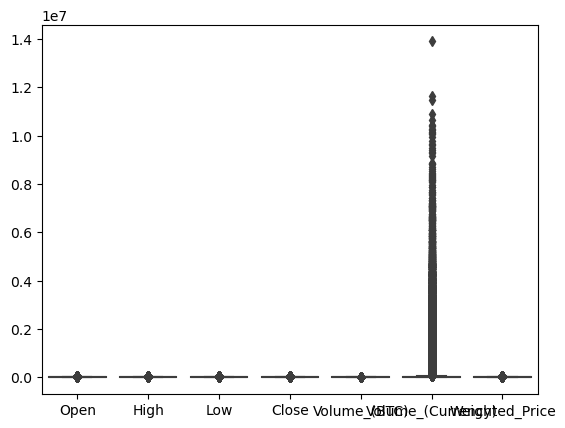

In [9]:
import seaborn as sns
sns.boxplot(data=df)

In [10]:
df.drop('Volume_(Currency)', axis = 1, inplace = True)
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Weighted_Price
0,2011-12-31 02:52:00,4.39,4.39,4.39,4.39,0.455581,4.390000
478,2011-12-31 10:50:00,4.39,4.39,4.39,4.39,48.000000,4.390000
547,2011-12-31 11:59:00,4.50,4.57,4.50,4.57,37.862297,4.526411
548,2011-12-31 12:00:00,4.58,4.58,4.58,4.58,9.000000,4.580000
1224,2011-12-31 23:16:00,4.58,4.58,4.58,4.58,1.502000,4.580000
...,...,...,...,...,...,...,...
4857372,2021-03-30 19:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,58692.753339
4857373,2021-03-30 19:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,58693.226508
4857374,2021-03-30 19:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,58696.198496
4857375,2021-03-30 19:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,58761.866202


<AxesSubplot:>

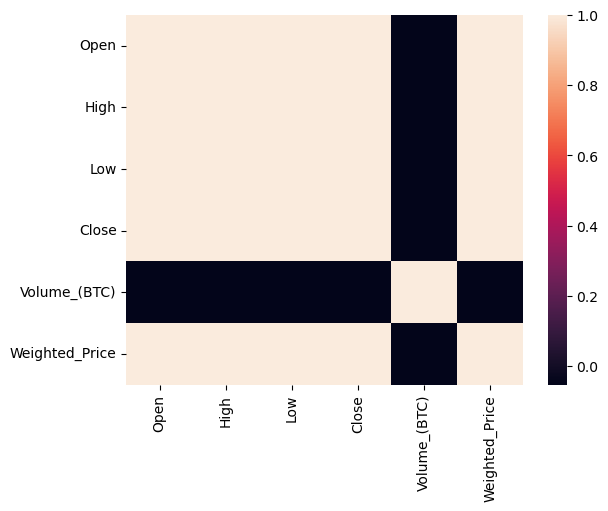

In [11]:
sns.heatmap(df.corr())

In [17]:
new_df = df[(df['Timestamp']>'2019-01-01')]
new_df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Weighted_Price
3676877,2019-01-01 00:01:00,3684.34,3685.26,3679.80,3680.37,2.121656,3680.490847
3676878,2019-01-01 00:02:00,3680.37,3680.37,3679.80,3679.80,2.156572,3679.875519
3676879,2019-01-01 00:03:00,3679.80,3684.47,3679.80,3679.80,0.890650,3681.490916
3676880,2019-01-01 00:04:00,3682.00,3683.71,3682.00,3683.71,0.056463,3682.804449
3676881,2019-01-01 00:05:00,3683.71,3683.71,3683.71,3683.71,0.033507,3683.710000
...,...,...,...,...,...,...,...
4857372,2021-03-30 19:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,58692.753339
4857373,2021-03-30 19:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,58693.226508
4857374,2021-03-30 19:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,58696.198496
4857375,2021-03-30 19:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,58761.866202


<AxesSubplot:>

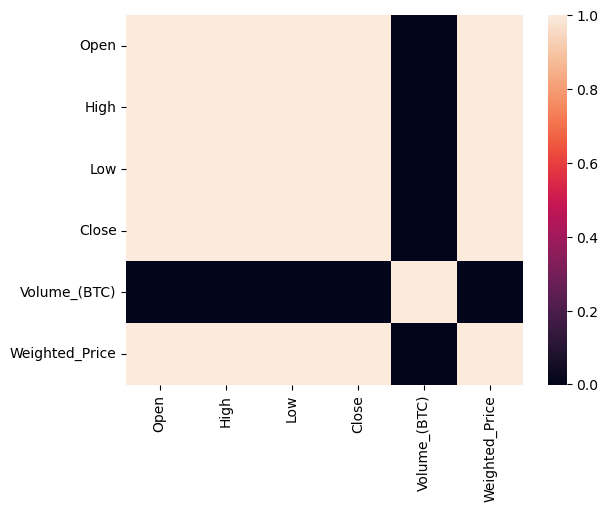

In [18]:
df = new_df

In [14]:
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 02:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,2011-12-31 10:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,2011-12-31 11:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,2011-12-31 12:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,2011-12-31 23:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
4857372,2021-03-30 19:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-30 19:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-30 19:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-30 19:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


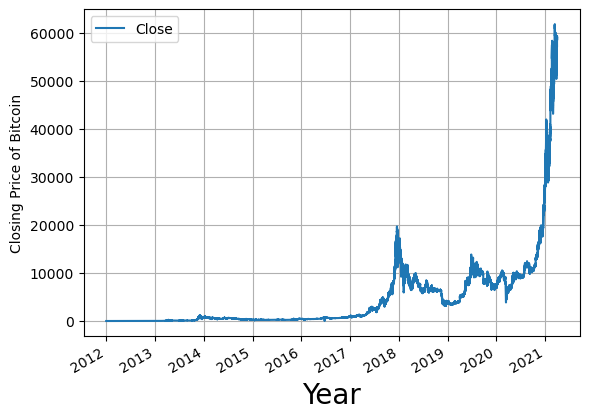

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot(x="Timestamp",y="Close")
plt.xlabel('Year',size=20)
plt.ylabel('Closing Price of Bitcoin',size=10)
plt.grid()

In [2]:

close_bitcoin = df.loc[df['name']=='Bitcoin','close']

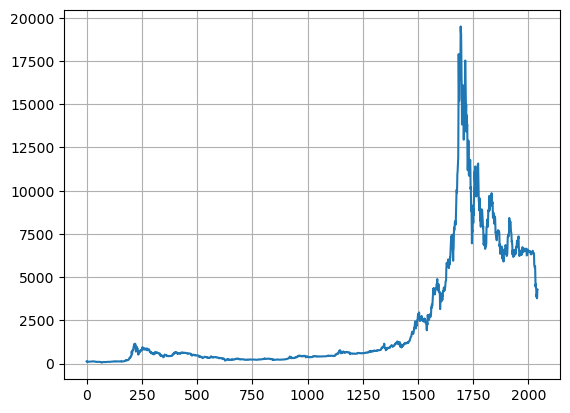

In [3]:
close_bitcoin.plot()
plt.grid(True)

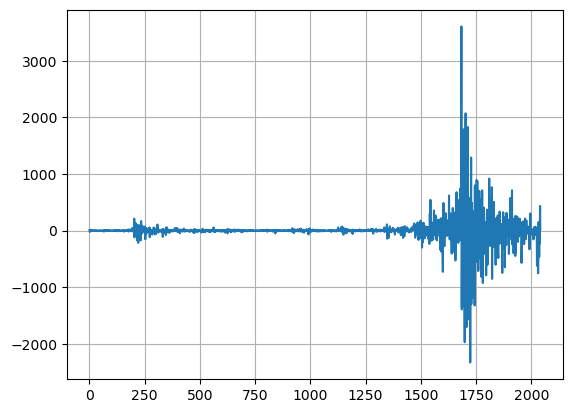

In [4]:
import numpy as np
returns = np.diff(close_bitcoin)
plt.plot(returns)
plt.grid(True)

In [5]:
df.isnull().sum()

slug           0
symbol         0
name           0
date           0
ranknow        0
open           0
high           0
low            0
close          0
volume         0
market         0
close_ratio    0
spread         0
dtype: int64

In [6]:
df['slug'].value_counts(), df['ranknow'].value_counts(), df['volume'].value_counts()

(bitcoin                            2042
 litecoin                           2042
 namecoin                           2042
 novacoin                           2041
 peercoin                           2041
                                    ... 
 stacs                                 3
 bitnautic-token                       2
 beat                                  2
 atlas-protocol                        2
 blockchain-certified-data-token       2
 Name: slug, Length: 2071, dtype: int64,
 1505    2080
 1       2042
 371     2042
 7       2042
 700     2041
         ... 
 1785       3
 1849       2
 1751       2
 1897       2
 1905       2
 Name: ranknow, Length: 2068, dtype: int64,
 0.0          27820
 1.0          15366
 2.0           9400
 3.0           7309
 4.0           6482
              ...  
 1662250.0        1
 1408550.0        1
 388257.0         1
 854683.0         1
 102695.0         1
 Name: volume, Length: 300528, dtype: int64)

In [7]:
drop_cols = ['slug','symbol']
df.drop(drop_cols,axis=1, inplace=True)
df

,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32
...,...,...,...,...,...,...,...,...,...,...,...
942292,Project-X,2018-11-26,1727,22424.60,23049.30,17607.50,20724.80,143.0,1.622000e+03,0.5728,5441.80
942293,Project-X,2018-11-27,1727,20711.90,23742.10,19292.90,23298.70,637.0,1.823000e+03,0.9003,4449.20
942294,Project-X,2018-11-28,1727,23320.90,25235.10,19888.10,24442.70,49.0,1.913000e+03,0.8518,5347.00
942295,Project-X,2018-11-29,1727,24543.53,24582.47,21457.95,22839.44,153.0,1.788000e+03,0.4421,3124.52


In [8]:
df['date'] = pd.to_datetime(df['date'], yearfirst=True)

In [9]:
df.dtypes

name                   object
date           datetime64[ns]
ranknow                 int64
open                  float64
high                  float64
low                   float64
close                 float64
volume                float64
market                float64
close_ratio           float64
spread                float64
dtype: object

In [10]:
import datetime

trump_elected_event = df[df['date'].dt.date>=datetime.date(2015,1,1)]
trump_elected_event

,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
613,Bitcoin,2015-01-01,1,320.43,320.43,314.00,314.25,8036550.0,4.297536e+09,0.0389,6.43
614,Bitcoin,2015-01-02,1,314.08,315.84,313.57,315.03,7860650.0,4.309551e+09,0.6432,2.27
615,Bitcoin,2015-01-03,1,314.85,315.15,281.08,281.08,33054400.0,3.846270e+09,0.0000,34.07
616,Bitcoin,2015-01-04,1,281.15,287.23,257.61,264.20,55629100.0,3.616321e+09,0.2225,29.62
617,Bitcoin,2015-01-05,1,265.08,278.34,265.08,274.47,43962800.0,3.758098e+09,0.7081,13.26
...,...,...,...,...,...,...,...,...,...,...,...
942292,Project-X,2018-11-26,1727,22424.60,23049.30,17607.50,20724.80,143.0,1.622000e+03,0.5728,5441.80
942293,Project-X,2018-11-27,1727,20711.90,23742.10,19292.90,23298.70,637.0,1.823000e+03,0.9003,4449.20
942294,Project-X,2018-11-28,1727,23320.90,25235.10,19888.10,24442.70,49.0,1.913000e+03,0.8518,5347.00
942295,Project-X,2018-11-29,1727,24543.53,24582.47,21457.95,22839.44,153.0,1.788000e+03,0.4421,3124.52


In [11]:
trump_elected_event = trump_elected_event[trump_elected_event['date'].dt.date<datetime.date(2017,12,31)]

In [12]:
trump_elected_event

,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
613,Bitcoin,2015-01-01,1,320.43,320.43,314.00,314.25,8036550.0,4.297536e+09,0.0389,6.43
614,Bitcoin,2015-01-02,1,314.08,315.84,313.57,315.03,7860650.0,4.309551e+09,0.6432,2.27
615,Bitcoin,2015-01-03,1,314.85,315.15,281.08,281.08,33054400.0,3.846270e+09,0.0000,34.07
616,Bitcoin,2015-01-04,1,281.15,287.23,257.61,264.20,55629100.0,3.616321e+09,0.2225,29.62
617,Bitcoin,2015-01-05,1,265.08,278.34,265.08,274.47,43962800.0,3.758098e+09,0.7081,13.26
...,...,...,...,...,...,...,...,...,...,...,...
941959,Project-X,2017-12-26,1727,2298390.00,2926100.00,2030590.00,2278930.00,134610.0,1.783580e+05,0.2773,895510.00
941960,Project-X,2017-12-27,1727,2280580.00,2550090.00,779527.00,855170.00,54631.0,6.692900e+04,0.0427,1770563.00
941961,Project-X,2017-12-28,1727,853376.00,1217350.00,289847.00,943642.00,37305.0,7.385300e+04,0.7049,927503.00
941962,Project-X,2017-12-29,1727,953410.00,1034770.00,502151.00,712084.00,23790.0,5.573100e+04,0.3942,532619.00


In [13]:
lis = trump_elected_event['name'].value_counts().tolist()

In [14]:
len(lis)

957

In [15]:
lis[0:10]

[1095, 1095, 1095, 1095, 1095, 1095, 1095, 1095, 1095, 1095]

In [16]:
trump_elected_event['name'].value_counts()

Bitcoin        1095
Quatloo        1095
Primecoin      1095
Namecoin       1095
GameCredits    1095
               ... 
Neumark           2
Jiyo [OLD]        2
QLC Chain         2
UTRUST            2
WandX             2
Name: name, Length: 957, dtype: int64

In [17]:
bitcoin_data = trump_elected_event.loc[trump_elected_event['name']=='Bitcoin']

In [18]:
bitcoin_data

,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
613,Bitcoin,2015-01-01,1,320.43,320.43,314.00,314.25,8.036550e+06,4.297536e+09,0.0389,6.43
614,Bitcoin,2015-01-02,1,314.08,315.84,313.57,315.03,7.860650e+06,4.309551e+09,0.6432,2.27
615,Bitcoin,2015-01-03,1,314.85,315.15,281.08,281.08,3.305440e+07,3.846270e+09,0.0000,34.07
616,Bitcoin,2015-01-04,1,281.15,287.23,257.61,264.20,5.562910e+07,3.616321e+09,0.2225,29.62
617,Bitcoin,2015-01-05,1,265.08,278.34,265.08,274.47,4.396280e+07,3.758098e+09,0.7081,13.26
...,...,...,...,...,...,...,...,...,...,...,...
1703,Bitcoin,2017-12-26,1,14036.60,16461.20,14028.90,16099.80,1.345430e+10,2.699081e+11,0.8514,2432.30
1704,Bitcoin,2017-12-27,1,16163.50,16930.90,15114.30,15838.50,1.248760e+10,2.655592e+11,0.3987,1816.60
1705,Bitcoin,2017-12-28,1,15864.10,15888.40,13937.30,14606.50,1.233650e+10,2.449298e+11,0.3430,1951.10
1706,Bitcoin,2017-12-29,1,14695.80,15279.00,14307.00,14656.20,1.302550e+10,2.457936e+11,0.3593,972.00


In [19]:
bitcoin_data['predict'] = bitcoin_data['high'].shift(-30)
bitcoin_data

C:\Users\abhis\AppData\Local\Temp\ipykernel_14852\3770911621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_data['predict'] = bitcoin_data['high'].shift(-30)


,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,predict
613,Bitcoin,2015-01-01,1,320.43,320.43,314.00,314.25,8.036550e+06,4.297536e+09,0.0389,6.43,233.50
614,Bitcoin,2015-01-02,1,314.08,315.84,313.57,315.03,7.860650e+06,4.309551e+09,0.6432,2.27,231.57
615,Bitcoin,2015-01-03,1,314.85,315.15,281.08,281.08,3.305440e+07,3.846270e+09,0.0000,34.07,242.18
616,Bitcoin,2015-01-04,1,281.15,287.23,257.61,264.20,5.562910e+07,3.616321e+09,0.2225,29.62,245.96
617,Bitcoin,2015-01-05,1,265.08,278.34,265.08,274.47,4.396280e+07,3.758098e+09,0.7081,13.26,230.06
...,...,...,...,...,...,...,...,...,...,...,...,...
1703,Bitcoin,2017-12-26,1,14036.60,16461.20,14028.90,16099.80,1.345430e+10,2.699081e+11,0.8514,2432.30,NaN
1704,Bitcoin,2017-12-27,1,16163.50,16930.90,15114.30,15838.50,1.248760e+10,2.655592e+11,0.3987,1816.60,NaN
1705,Bitcoin,2017-12-28,1,15864.10,15888.40,13937.30,14606.50,1.233650e+10,2.449298e+11,0.3430,1951.10,NaN
1706,Bitcoin,2017-12-29,1,14695.80,15279.00,14307.00,14656.20,1.302550e+10,2.457936e+11,0.3593,972.00,NaN


In [20]:
filtered_bitcoindata = bitcoin_data[0:-30]
filtered_bitcoindata

,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,predict
613,Bitcoin,2015-01-01,1,320.43,320.43,314.00,314.25,8.036550e+06,4.297536e+09,0.0389,6.43,233.50
614,Bitcoin,2015-01-02,1,314.08,315.84,313.57,315.03,7.860650e+06,4.309551e+09,0.6432,2.27,231.57
615,Bitcoin,2015-01-03,1,314.85,315.15,281.08,281.08,3.305440e+07,3.846270e+09,0.0000,34.07,242.18
616,Bitcoin,2015-01-04,1,281.15,287.23,257.61,264.20,5.562910e+07,3.616321e+09,0.2225,29.62,245.96
617,Bitcoin,2015-01-05,1,265.08,278.34,265.08,274.47,4.396280e+07,3.758098e+09,0.7081,13.26,230.06
...,...,...,...,...,...,...,...,...,...,...,...,...
1673,Bitcoin,2017-11-26,1,8789.04,9522.93,8775.59,9330.55,5.475580e+09,1.558507e+11,0.7426,747.34,16461.20
1674,Bitcoin,2017-11-27,1,9352.72,9818.35,9352.72,9818.35,5.653320e+09,1.640195e+11,1.0000,465.63,16930.90
1675,Bitcoin,2017-11-28,1,9823.43,10125.70,9736.30,10058.80,6.348820e+09,1.680560e+11,0.8282,389.40,15888.40
1676,Bitcoin,2017-11-29,1,10077.40,11517.40,9601.03,9888.61,1.156880e+10,1.652337e+11,0.1501,1916.37,15279.00


In [21]:
X = filtered_bitcoindata['high']
y = filtered_bitcoindata['predict']

In [22]:
X.values

array([  320.43,   315.84,   315.15, ..., 10125.7 , 11517.4 , 10801.  ])

In [23]:
X = np.array(X.values.reshape(-1,1))
X

array([[  320.43],
       [  315.84],
       [  315.15],
       ...,
       [10125.7 ],
       [11517.4 ],
       [10801.  ]])

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
# Create a model 
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [27]:
rf_model.score(X_test, y_test)

0.9590508452725938

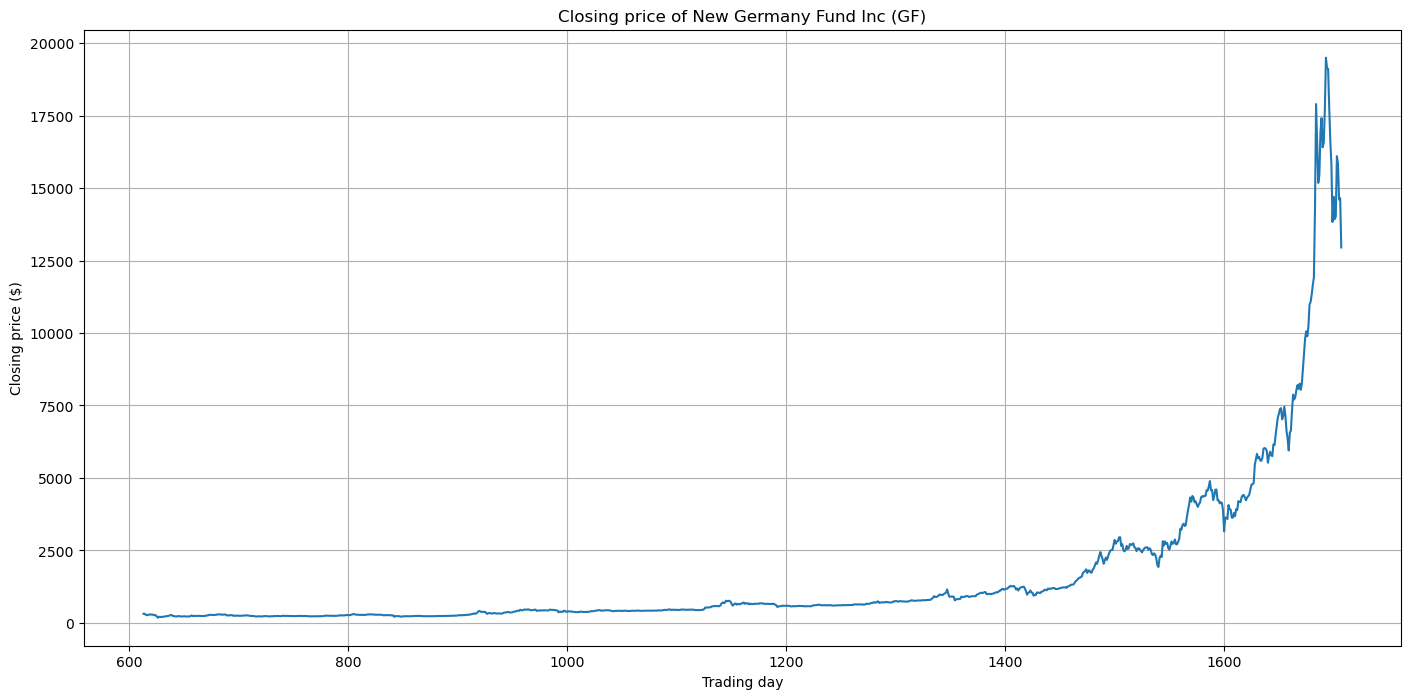

In [28]:


    # Plot closing price

    plt.figure(figsize=(17, 8))
    plt.plot(bitcoin_data.close)
    plt.title('Closing price of Bitcoin')
    plt.ylabel('Closing price ($)')
    plt.xlabel('Trading day')
    plt.grid(True)

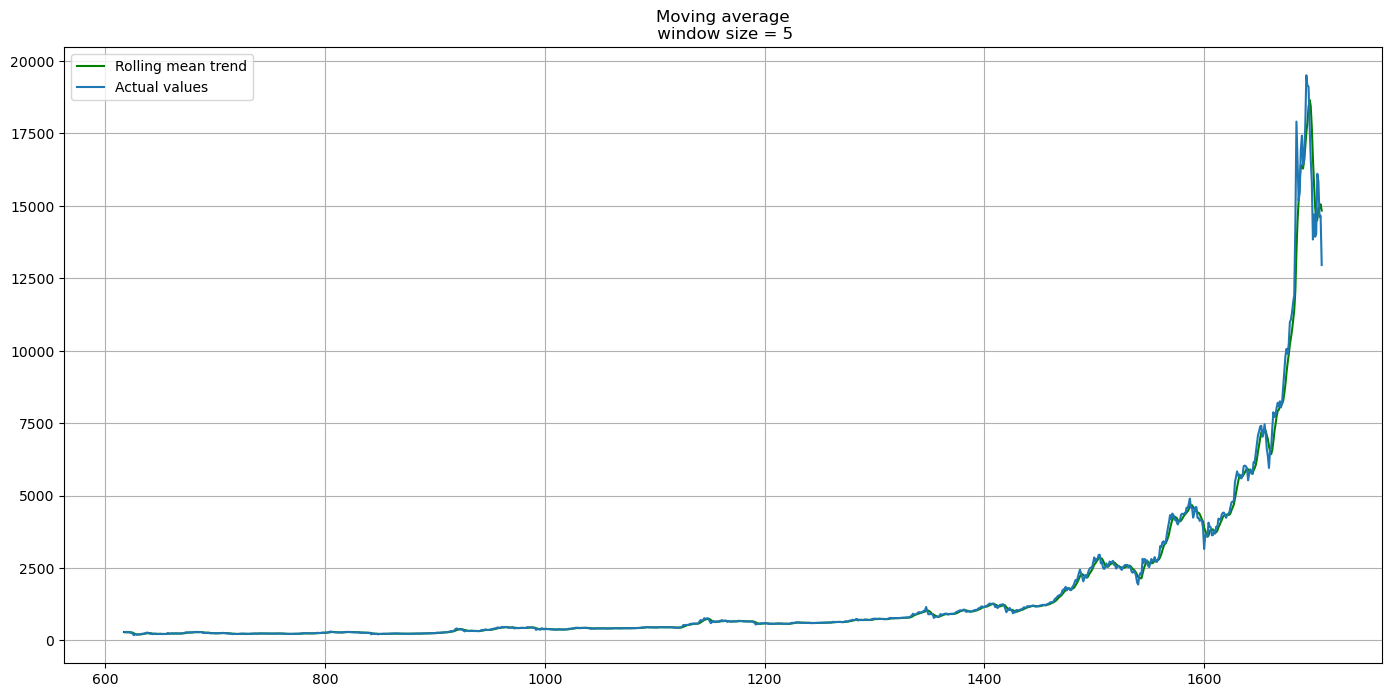

In [29]:
from sklearn.metrics import mean_absolute_error
#def mean_absolute_percentage_error(y_true, y_pred):
#    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    rolling_mean = series.rolling(window=window).mean()
 
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')

    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')

    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

#Smooth by the previous 5 days (by week)
plot_moving_average(bitcoin_data.close, 5)

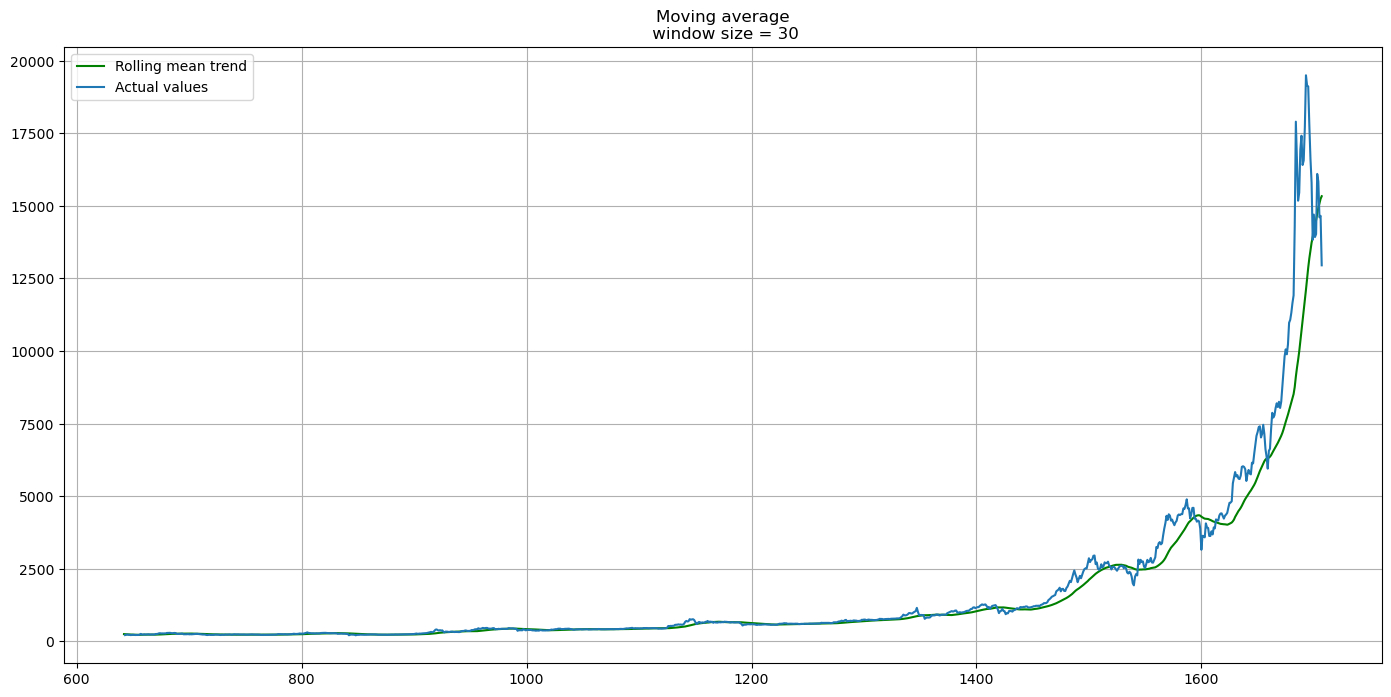

In [30]:
#Smooth by the previous month (30 days)
plot_moving_average(bitcoin_data.close, 30)

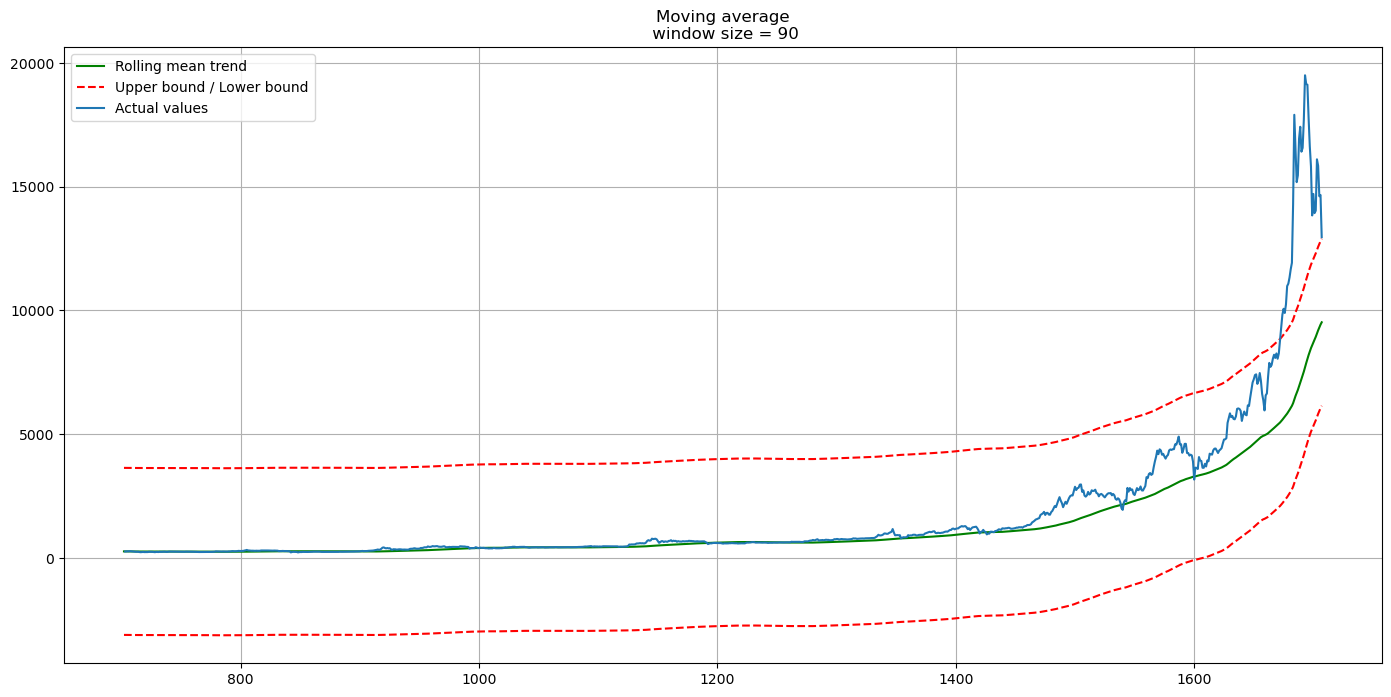

In [31]:
#Smooth by previous quarter (90 days)
plot_moving_average(bitcoin_data.close, 90, plot_intervals=True)

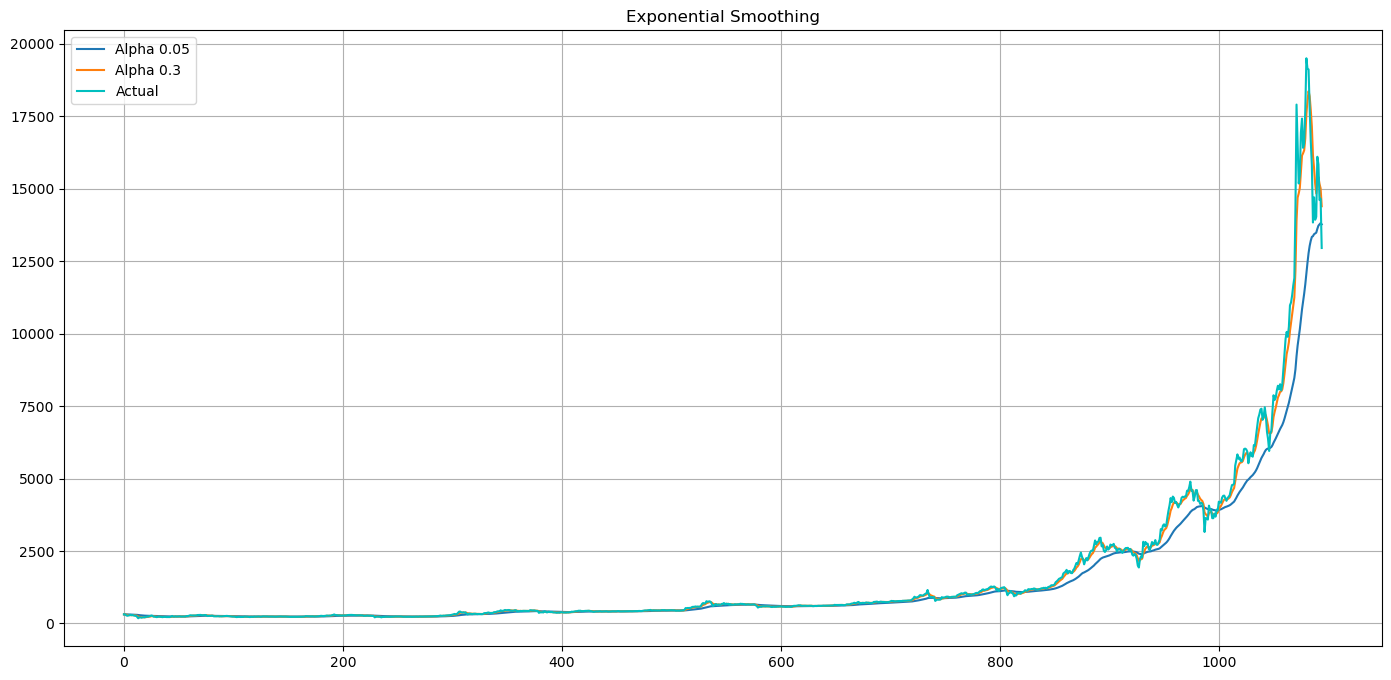

In [45]:
def exponential_smoothing(series, alpha):
    series = series.to_list()
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plot_exponential_smoothing(series, alphas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);
        
plot_exponential_smoothing(bitcoin_data.close, [0.05, 0.3])

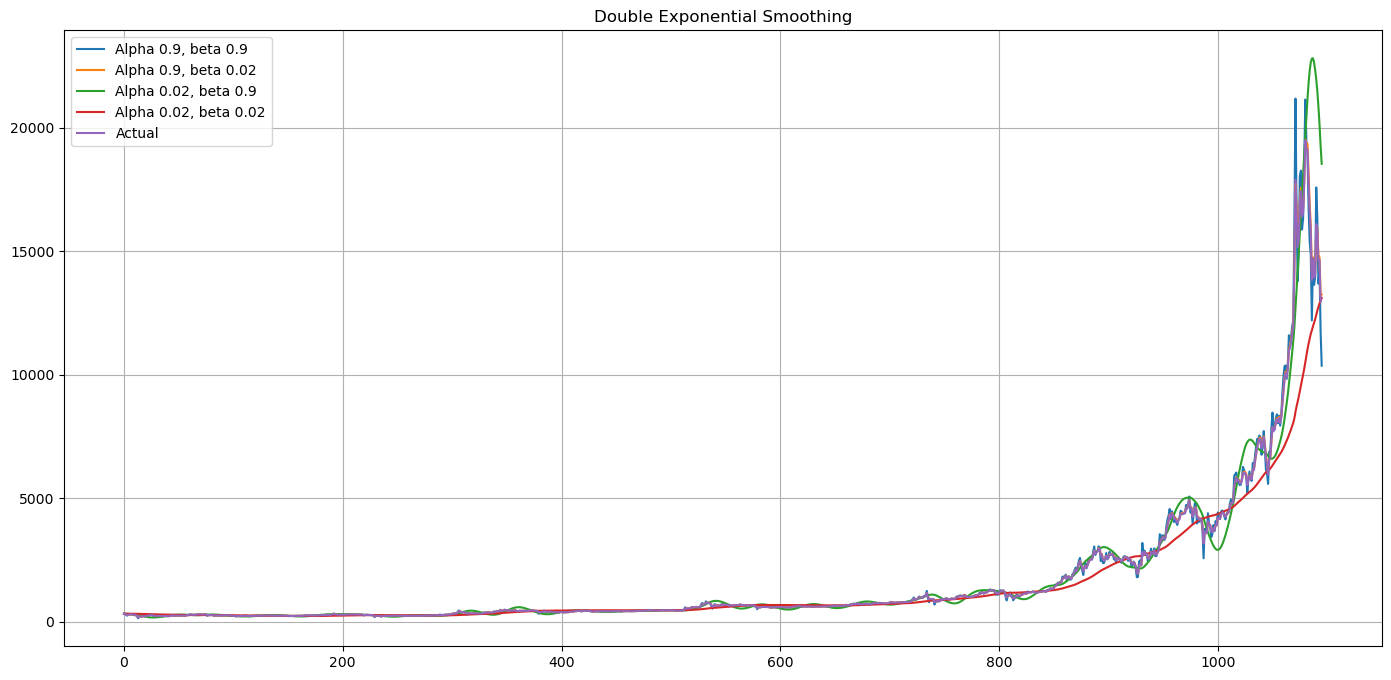

In [43]:
def double_exponential_smoothing(series, alpha, beta):
    series = series.to_list()
    result = [series[0]]
    
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

plot_double_exponential_smoothing(bitcoin_data.close, alphas=[0.9, 0.02], betas=[0.9, 0.02])

C:\Users\abhis\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


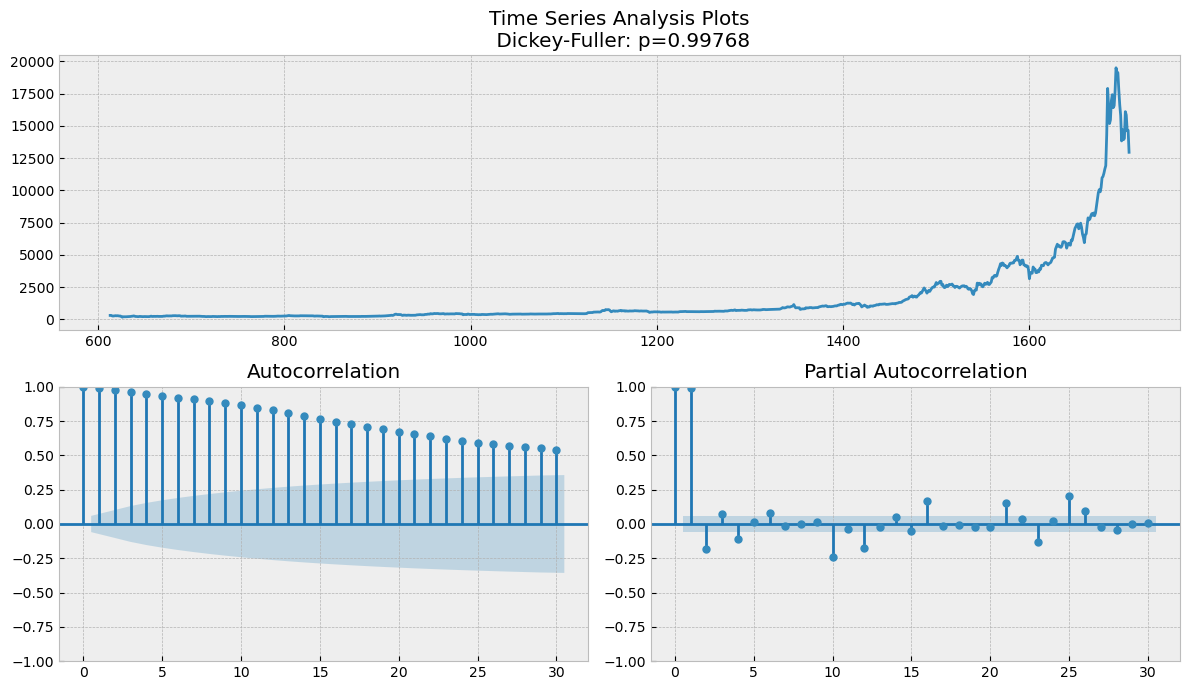

In [46]:
import statsmodels.api as sm
import statsmodels as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        #smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        #smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        smt.graphics.tsaplots.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.tsaplots.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(bitcoin_data.close, lags=30)

C:\Users\abhis\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


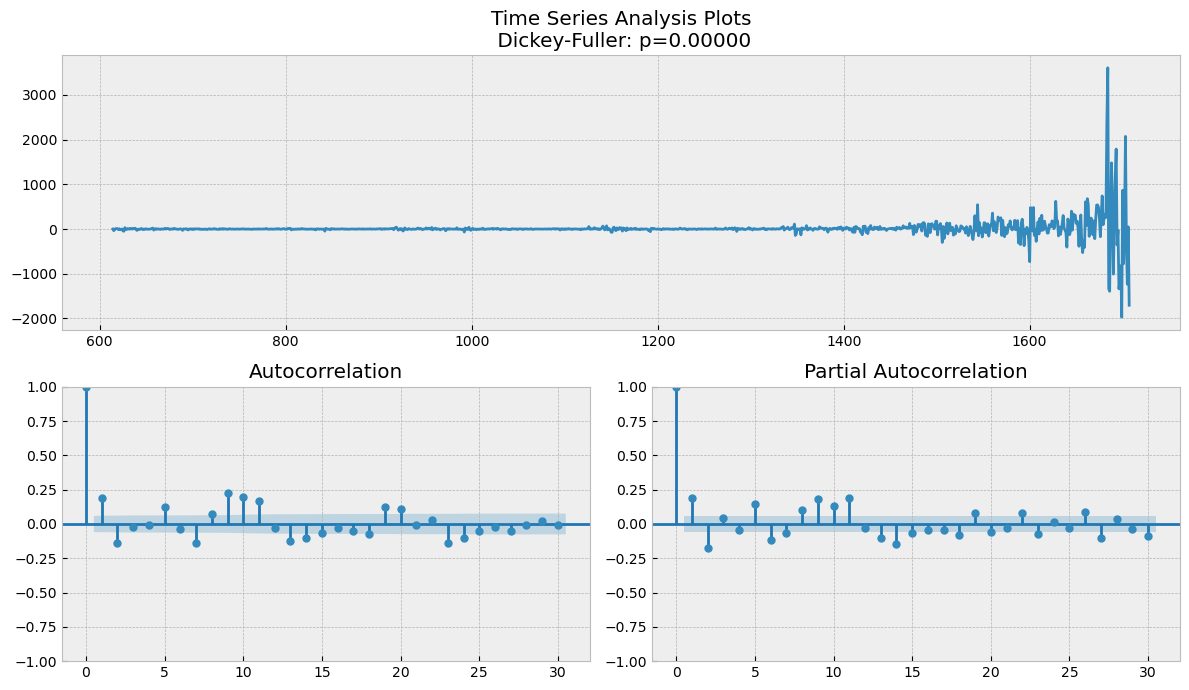

In [47]:
# Take the first difference to remove to make the process stationary
data_diff = bitcoin_data.close - bitcoin_data.close.shift(1)

tsplot(data_diff[1:], lags=30)

In [28]:
X_train = X[:800]
X_test = X[800:]
y_train = y[:800]
y_test = y[800:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1), (265, 1), (800,), (265,))

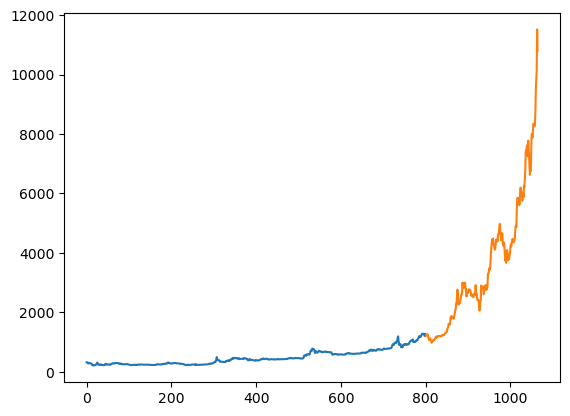

In [29]:
plt.plot(list(range(0,800)), X_train, )
plt.plot(list(range(800,800+265)), X_test)

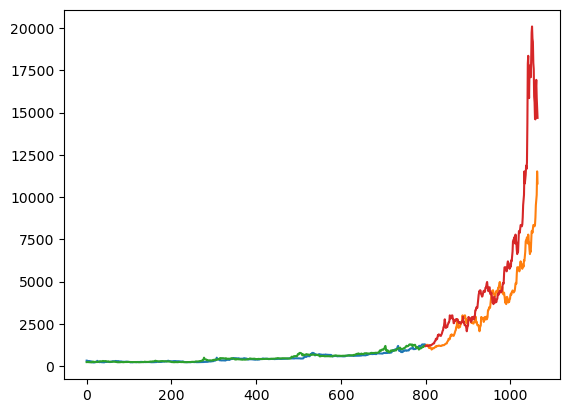

In [30]:
plt.plot(list(range(0,800)), X_train, )
plt.plot(list(range(800,800+265)), X_test)
plt.plot(list(range(0,800)), y_train, )
plt.plot(list(range(800,800+265)), y_test)

In [31]:
# Create a model 
rf_model2 = RandomForestRegressor()

# Train the model
rf_model2.fit(X_train, y_train)

# Score the model
rf_model2.score(X_test, y_test)

-0.868482048970201

In [32]:
y_pred = rf_model2.predict(X_test)

R-Squared: -0.868482


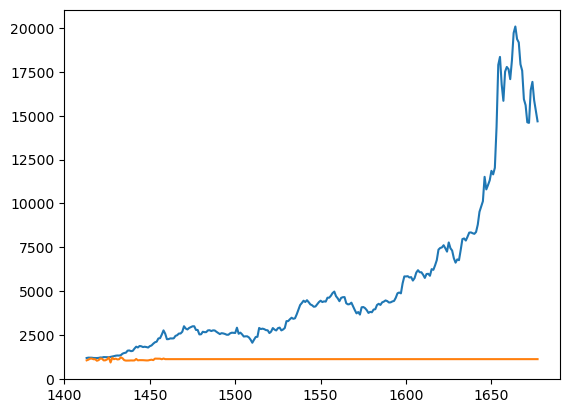

In [33]:
from sklearn.metrics import r2_score

y_pred_df = pd.DataFrame(y_pred, columns=['High'], index=y_test.index)

plt.plot(y_test)
plt.plot(y_pred_df)
print('R-Squared: %f'%(r2_score(y_test, y_pred)))

In [34]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')

In [35]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

R-Squared: -1.143106


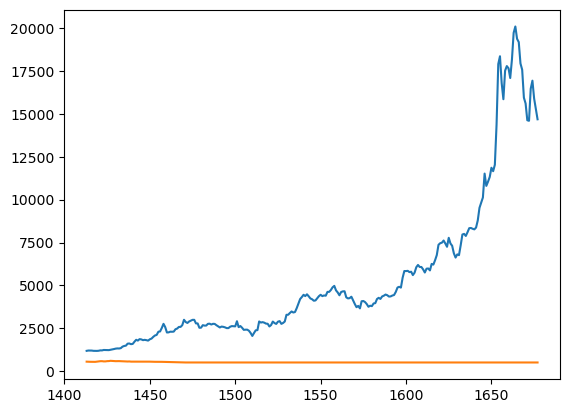

In [36]:
y_pred_df = pd.DataFrame(y_pred, columns=['High'], index=y_test.index)

plt.plot(y_test)
plt.plot(y_pred_df)
print('R-Squared: %f'%(r2_score(y_test, y_pred)))

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K

In [38]:
#K.clear_session()
model = Sequential()
model.add(Dense(1, input_shape=(X_test.shape[1],), activation='tanh', kernel_initializer='lecun_uniform'))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=100, verbose=1)

Epoch 1/100


C:\Users\abhis\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


50/50 [==============================] - 0s 2ms/step - loss: 337837.5938
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 337837.5625
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 337837.5625
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 337837.5625
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 337837.5938
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 337837.6250
Epoch 7/100
50/50 [==============================] - 0s 1ms/step - loss: 337837.5312
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 337837.5938
Epoch 9/100
50/50 [==============================] - 0s 1ms/step - loss: 337837.5625
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 337837.6250
Epoch 11/100
50/50 [==============================] - 0s 2ms/step - loss: 337837.6250
Epoch 12/100
50/50 [==============================] - 0s 2ms/step - loss: 3

In [39]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

r2_test = r2_score(y_test, y_pred)
print("R-squared is: %f"%r2_test)

R-squared is: -1.143106


In [40]:
y_pred = model.predict(X_test)

9/9 [==============================] - 0s 2ms/step


R-Squared: -1.405283


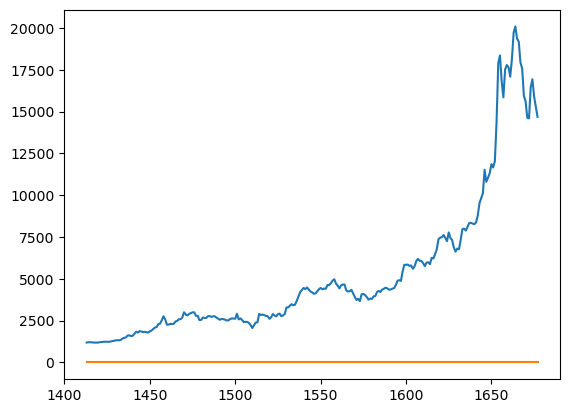

In [41]:
y_pred_df = pd.DataFrame(y_pred, columns=['High'], index=y_test.index)

plt.plot(y_test)
plt.plot(y_pred_df)
print('R-Squared: %f'%(r2_score(y_test, y_pred)))

In [42]:
#K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=50, verbose=1)

Epoch 1/50


C:\Users\abhis\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


50/50 [==============================] - 0s 2ms/step - loss: 36222.3047
Epoch 2/50
50/50 [==============================] - 0s 1ms/step - loss: 7314.3594
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 7143.8164
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 7277.4204
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 7243.4868
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 7749.3232
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 7476.5068
Epoch 8/50
50/50 [==============================] - 0s 2ms/step - loss: 7478.5576
Epoch 9/50
50/50 [==============================] - 0s 2ms/step - loss: 7686.3706
Epoch 10/50
50/50 [==============================] - 0s 2ms/step - loss: 7694.9492
Epoch 11/50
50/50 [==============================] - 0s 2ms/step - loss: 7400.6860
Epoch 12/50
50/50 [==============================] - 0s 2ms/step - loss: 7198.0020
Epoch 13/50
50/50 [====

In [43]:
y_pred = model.predict(X_test)

9/9 [==============================] - 0s 733us/step


R-Squared: 0.520033


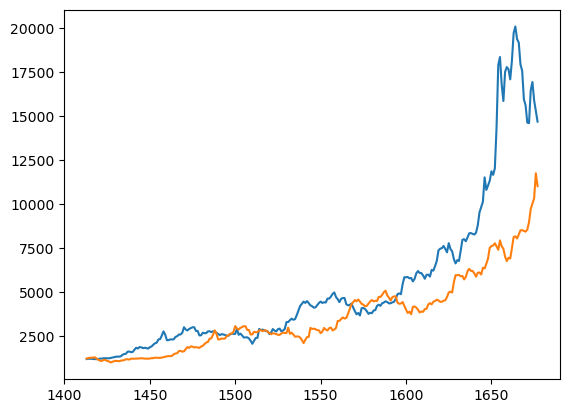

In [44]:
y_pred_df = pd.DataFrame(y_pred, columns=['High'], index=y_test.index)

plt.plot(y_test)
plt.plot(y_pred_df)
print('R-Squared: %f'%(r2_score(y_test, y_pred)))

In [45]:
#K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=50, verbose=1)

Epoch 1/50


C:\Users\abhis\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


50/50 [==============================] - 0s 2ms/step - loss: 25252.5273
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 7243.5327
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 7189.7852
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 7083.5688
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 7191.9526
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 7219.9258
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 7167.5581
Epoch 8/50
50/50 [==============================] - 0s 2ms/step - loss: 7431.1733
Epoch 9/50
50/50 [==============================] - 0s 2ms/step - loss: 7186.8096
Epoch 10/50
50/50 [==============================] - 0s 2ms/step - loss: 7399.5483
Epoch 11/50
50/50 [==============================] - 0s 2ms/step - loss: 7494.1646
Epoch 12/50
50/50 [==============================] - 0s 2ms/step - loss: 7260.1167
Epoch 13/50
50/50 [====

In [46]:
y_pred = model.predict(X_test)

9/9 [==============================] - 0s 2ms/step


R-Squared: 0.589799


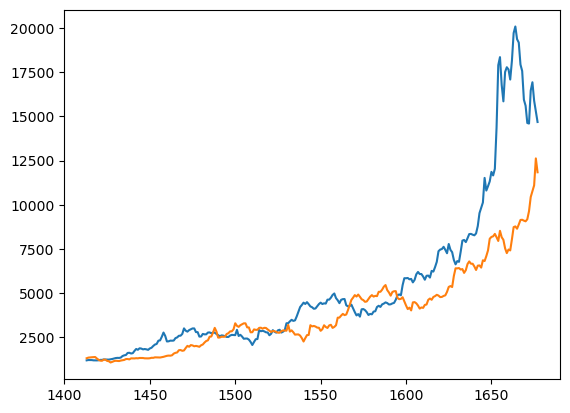

In [47]:
y_pred_df = pd.DataFrame(y_pred, columns=['High'], index=y_test.index)

plt.plot(y_test)
plt.plot(y_pred_df)
print('R-Squared: %f'%(r2_score(y_test, y_pred)))